In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=0)

# Full Conected Neural Network

### Sequential Model
    model = Sequential([Dense(unit=2), Dense(unit=2), Dense(unit=1))

### Functional Model
    model = Sequential()
    model.add(Dense(unit=2))
    model.add(Dense(unit=2))
    model.add(Dense(unit=1))

In [5]:
model = Sequential()
model.add(Dense(units=13, activation = 'relu', input_shape=(13,)))
model.add(Dense(units=7, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 98        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test), verbose=1)

Epoch 1/400
8/8 [==============================] - 2s 80ms/step - loss: 0.6420 - accuracy: 0.6079 - val_loss: 0.6097 - val_accuracy: 0.5789
Epoch 2/400
8/8 [==============================] - 0s 12ms/step - loss: 0.6117 - accuracy: 0.6079 - val_loss: 0.5879 - val_accuracy: 0.6053
Epoch 3/400
8/8 [==============================] - 0s 19ms/step - loss: 0.5872 - accuracy: 0.6520 - val_loss: 0.5705 - val_accuracy: 0.6579
Epoch 4/400
8/8 [==============================] - 0s 17ms/step - loss: 0.5674 - accuracy: 0.6828 - val_loss: 0.5552 - val_accuracy: 0.6579
Epoch 5/400
8/8 [==============================] - 0s 17ms/step - loss: 0.5506 - accuracy: 0.7269 - val_loss: 0.5421 - val_accuracy: 0.6579
Epoch 6/400
8/8 [==============================] - 0s 11ms/step - loss: 0.5342 - accuracy: 0.7445 - val_loss: 0.5297 - val_accuracy: 0.6842
Epoch 7/400
8/8 [==============================] - 0s 12ms/step - loss: 0.5203 - accuracy: 0.7533 - val_loss: 0.5179 - val_accuracy: 0.7237
Epoch 8/400
8/8 [===

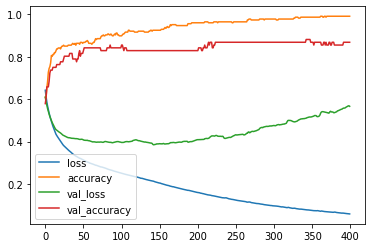

In [7]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_label('Epochs')

# Dropout Neural Network

In [8]:
model = Sequential()
model.add(Dense(units=13, activation = 'relu', input_shape=(13,)))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 13)                182       
                                                                 
 dropout (Dropout)           (None, 13)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 98        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test), verbose=1)

Epoch 1/400
8/8 [==============================] - 1s 31ms/step - loss: 0.8732 - accuracy: 0.5595 - val_loss: 0.8098 - val_accuracy: 0.4737
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 0.9042 - accuracy: 0.5022 - val_loss: 0.7816 - val_accuracy: 0.5132
Epoch 3/400
8/8 [==============================] - 0s 9ms/step - loss: 0.9396 - accuracy: 0.5463 - val_loss: 0.7592 - val_accuracy: 0.5263
Epoch 4/400
8/8 [==============================] - 0s 9ms/step - loss: 0.7857 - accuracy: 0.5286 - val_loss: 0.7432 - val_accuracy: 0.6053
Epoch 5/400
8/8 [==============================] - 0s 9ms/step - loss: 0.7553 - accuracy: 0.5154 - val_loss: 0.7291 - val_accuracy: 0.6316
Epoch 6/400
8/8 [==============================] - 0s 7ms/step - loss: 0.7462 - accuracy: 0.5815 - val_loss: 0.7172 - val_accuracy: 0.6447
Epoch 7/400
8/8 [==============================] - 0s 9ms/step - loss: 0.8107 - accuracy: 0.5771 - val_loss: 0.7055 - val_accuracy: 0.6579
Epoch 8/400
8/8 [=========

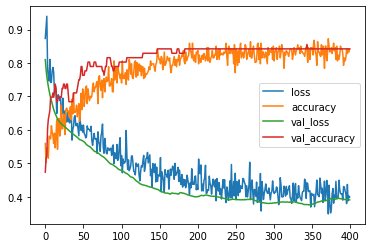

In [10]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_label('Epochs')

# Dropout Early Stopping Neutal Network

In [13]:
model = Sequential()
model.add(Dense(units=13, activation = 'relu', input_shape=(13,)))
model.add(Dropout(0.5))
model.add(Dense(units=7, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test), verbose=1, callbacks=[early_stop])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                182       
                                                                 
 dropout_4 (Dropout)         (None, 13)                0         
                                                                 
 dense_10 (Dense)            (None, 7)                 98        
                                                                 
 dropout_5 (Dropout)         (None, 7)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
8/8 [==============================] - 2s 58

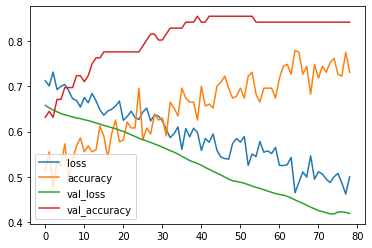

In [14]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_label('Epochs')